## Lección 5: Inferencia e Intervalos de Confianza para la Media

### 1. Cálculo de Intervalos de Confianza para la Media

Hasta ahora hemos trabajado con estadísticas descriptivas de nuestra muestra. Sin embargo, el objetivo de la inferencia estadística es hacer afirmaciones sobre toda la población estudiantil a partir de estos datos. 

Para lograr esto, calcularemos **Intervalos de Confianza (IC)**. Un IC nos da un rango de valores dentro del cual podemos estar seguros (generalmente al 95%) de que se encuentra el verdadero promedio de toda la universidad.

Calcularemos estos intervalos para nuestras dos variables continuas principales:
1. **Horas de Sueño**
2. **Minutos de Actividad Física**

> **Nota metodológica:** Utilizaremos la distribución *t de Student* para el cálculo, ya que la desviación estándar de la población total es desconocida y la estamos estimando a partir de nuestra muestra.

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# Cargar la base de datos
df = pd.read_csv('Muestra_universidad.csv')

def calcular_intervalo(variable, confianza=0.95):
    """Función para calcular el intervalo de confianza al 95% usando t-Student"""
    datos = df[variable]
    media = datos.mean()
    # stats.sem calcula el error estándar de la media (std / sqrt(n))
    error_estandar = stats.sem(datos) 
    grados_libertad = len(datos) - 1
    
    # Cálculo del intervalo
    limite_inf, limite_sup = stats.t.interval(
        confidence=confianza, 
        df=grados_libertad, 
        loc=media, 
        scale=error_estandar
    )
    return media, limite_inf, limite_sup

# Aplicamos la función a nuestras dos variables continuas
media_sueno, inf_sueno, sup_sueno = calcular_intervalo('Horas_Sueno')
media_ejercicio, inf_ejercicio, sup_ejercicio = calcular_intervalo('Minutos_Ejercicio')

# Imprimir los resultados con formato
print("--- INTERVALOS DE CONFIANZA AL 95% ---")
print(f"1. Horas de Sueño:")
print(f"   Media Muestral: {media_sueno:.2f} horas")
print(f"   El verdadero promedio de la universidad está entre: [{inf_sueno:.2f}h  y  {sup_sueno:.2f}h]\n")

print(f"2. Minutos de Actividad Física:")
print(f"   Media Muestral: {media_ejercicio:.2f} minutos")
print(f"   El verdadero promedio de la universidad está entre: [{inf_ejercicio:.2f}m  y  {sup_ejercicio:.2f}m]")

--- INTERVALOS DE CONFIANZA AL 95% ---
1. Horas de Sueño:
   Media Muestral: 6.51 horas
   El verdadero promedio de la universidad está entre: [6.40h  y  6.63h]

2. Minutos de Actividad Física:
   Media Muestral: 138.51 minutos
   El verdadero promedio de la universidad está entre: [133.88m  y  143.14m]


### 2. Interpretación de Resultados con Distintos Niveles de Confianza

El **Nivel de Confianza** (ej. 90%, 95%, 99%) representa qué tan seguros estamos de que nuestro intervalo contiene el verdadero promedio de la población. 

Existe un intercambio inevitable (trade-off) entre **confianza** y **precisión**:
* **Menor confianza (90%):** El intervalo es más estrecho y preciso, pero corremos un mayor riesgo (10%) de equivocarnos y que el verdadero promedio esté fuera del rango.
* **Mayor confianza (99%):** El intervalo es más ancho. Estamos casi seguros de no equivocarnos (solo 1% de error), pero la estimación se vuelve menos precisa (abarca demasiados valores posibles).

Para visualizar este efecto, calcularemos los intervalos para las **Horas de Sueño** utilizando tres niveles de confianza distintos.

--- COMPARACIÓN DE INTERVALOS (HORAS DE SUEÑO) ---
Media Muestral Exacta: 6.515 horas

Confianza 90%:
  Rango: [6.419h  -  6.610h]
  Amplitud del intervalo: 0.192 horas

Confianza 95%:
  Rango: [6.400h  -  6.629h]
  Amplitud del intervalo: 0.229 horas

Confianza 99%:
  Rango: [6.364h  -  6.665h]
  Amplitud del intervalo: 0.301 horas



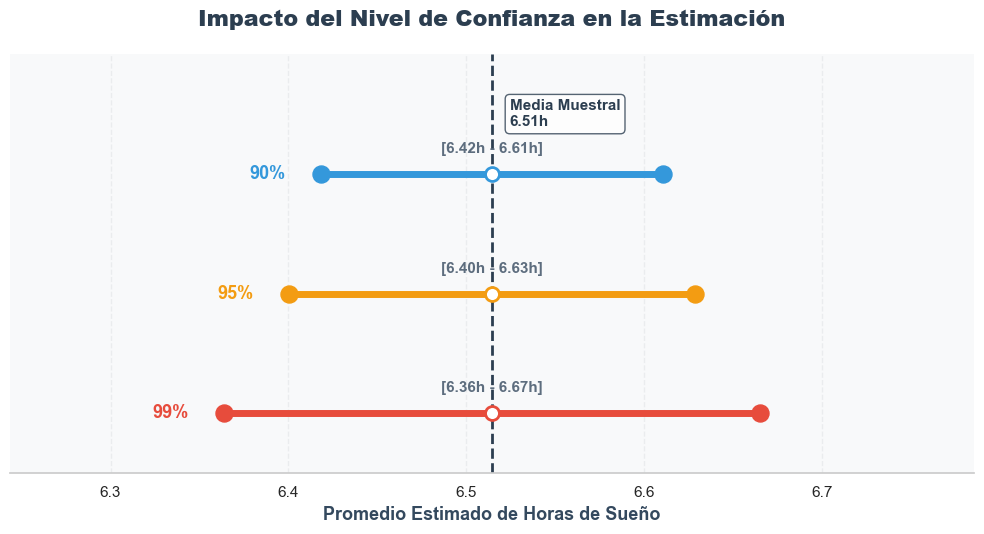

In [2]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos los datos
df = pd.read_csv('Muestra_universidad.csv')
datos_sueno = df['Horas_Sueno']

media = datos_sueno.mean()
error_estandar = stats.sem(datos_sueno)
grados_libertad = len(datos_sueno) - 1

niveles_confianza = [0.90, 0.95, 0.99]
resultados_ic = []

# Imprimimos los textos en consola
print("--- COMPARACIÓN DE INTERVALOS (HORAS DE SUEÑO) ---")
print(f"Media Muestral Exacta: {media:.3f} horas\n")

for conf in niveles_confianza:
    inf, sup = stats.t.interval(conf, df=grados_libertad, loc=media, scale=error_estandar)
    amplitud = sup - inf
    resultados_ic.append((conf, inf, sup))
    
    print(f"Confianza {conf*100:.0f}%:")
    print(f"  Rango: [{inf:.3f}h  -  {sup:.3f}h]")
    print(f"  Amplitud del intervalo: {amplitud:.3f} horas\n")

# --- CONSTRUCCIÓN DEL GRÁFICO MEJORADO ---
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#F8F9FA", "grid.color": "#E5E7E9"})
fig, ax = plt.subplots(figsize=(10, 5.5))

# Eje Y ficticio para separar las líneas (el 90% arriba y el 99% abajo)
y_pos = [3, 2, 1]  
colores = ['#3498DB', '#F39C12', '#E74C3C'] # Azul, Naranja, Rojo

for i, (conf, inf, sup) in enumerate(resultados_ic):
    # 1. Dibujar la línea gruesa del intervalo
    ax.plot([inf, sup], [y_pos[i], y_pos[i]], color=colores[i], linewidth=5, zorder=1)
    
    # 2. Puntos gruesos en los extremos (Remates)
    ax.scatter([inf, sup], [y_pos[i], y_pos[i]], color=colores[i], s=150, zorder=2)
    
    # 3. Punto en la media muestral
    ax.scatter([media], [y_pos[i]], color='white', edgecolor=colores[i], s=100, linewidth=2, zorder=3)
    
    # 4. Etiqueta del Nivel de Confianza (A la izquierda de la línea)
    ax.text(inf - 0.02, y_pos[i], f"{conf*100:.0f}%", 
            verticalalignment='center', horizontalalignment='right',
            fontsize=13, fontweight='bold', color=colores[i])
    
    # 5. Etiqueta de Rango (Arriba de la línea)
    ax.text(media, y_pos[i] + 0.15, f"[{inf:.2f}h - {sup:.2f}h]", 
            verticalalignment='bottom', horizontalalignment='center',
            fontsize=11, fontweight='semibold', color='#5D6D7E')

# Línea vertical punteada de fondo para la media global
ax.axvline(media, color='#2C3E50', linestyle='--', linewidth=2, zorder=0)

# Cuadro de texto para la media
ax.text(media + 0.01, 3.5, f"Media Muestral\n{media:.2f}h", 
        verticalalignment='center', horizontalalignment='left',
        fontsize=11, fontweight='bold', color='#2C3E50',
        bbox=dict(facecolor='white', edgecolor='#2C3E50', boxstyle='round,pad=0.3', alpha=0.8))

ax.set_title('Impacto del Nivel de Confianza en la Estimación', 
             fontsize=16, fontweight='heavy', pad=20, color="#2C3E50")
ax.set_xlabel('Promedio Estimado de Horas de Sueño', fontsize=13, weight='bold', color="#34495E")

# Limpieza y márgenes del gráfico
ax.set_yticks([]) # Ocultamos el eje Y
ax.set_ylim(0.5, 4.0)
margen = (resultados_ic[-1][2] - resultados_ic[-1][1]) * 0.4
ax.set_xlim(resultados_ic[-1][1] - margen, resultados_ic[-1][2] + margen)

sns.despine(left=True, bottom=False, top=True, right=True)
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 3. Evaluar el Impacto del Tamaño Muestral sobre el Ancho del Intervalo

El ancho de un intervalo de confianza depende principalmente de dos factores: el nivel de confianza (que ya analizamos) y el **tamaño de la muestra ($n$)**. 

La fórmula matemática nos indica que el Error Estándar se calcula dividiendo la desviación estándar entre la raíz cuadrada de $n$ ($SE = \frac{s}{\sqrt{n}}$). Esto significa que la relación es inversamente proporcional:
* **Muestras pequeñas:** Generan mayor incertidumbre (mayor error estándar), obligando a que el intervalo sea mucho más ancho para poder garantizar el mismo nivel de confianza.
* **Muestras grandes:** Reducen radicalmente el error, permitiéndonos "acotar" mucho más el rango donde se encuentra el verdadero promedio de la universidad, logrando estimaciones sumamente precisas.

Para demostrar este efecto, tomaremos nuestra desviación estándar y media actual de **Horas de Sueño**, y simularemos cómo cambiaría el ancho del intervalo (al 95% de confianza) si nuestra encuesta hubiera tenido diferentes tamaños de muestra ($n = 30$, $n = 100$ y $n = 385$).

--- IMPACTO DEL TAMAÑO MUESTRAL (CONFIANZA FIJA AL 95%) ---
Media Base: 6.515 horas | Desviación Base: 1.141 horas

Tamaño de muestra (n=30):
  Rango: [6.088h  -  6.941h]
  Amplitud del intervalo: 0.852 horas

Tamaño de muestra (n=100):
  Rango: [6.288h  -  6.741h]
  Amplitud del intervalo: 0.453 horas

Tamaño de muestra (n=385):
  Rango: [6.400h  -  6.629h]
  Amplitud del intervalo: 0.229 horas



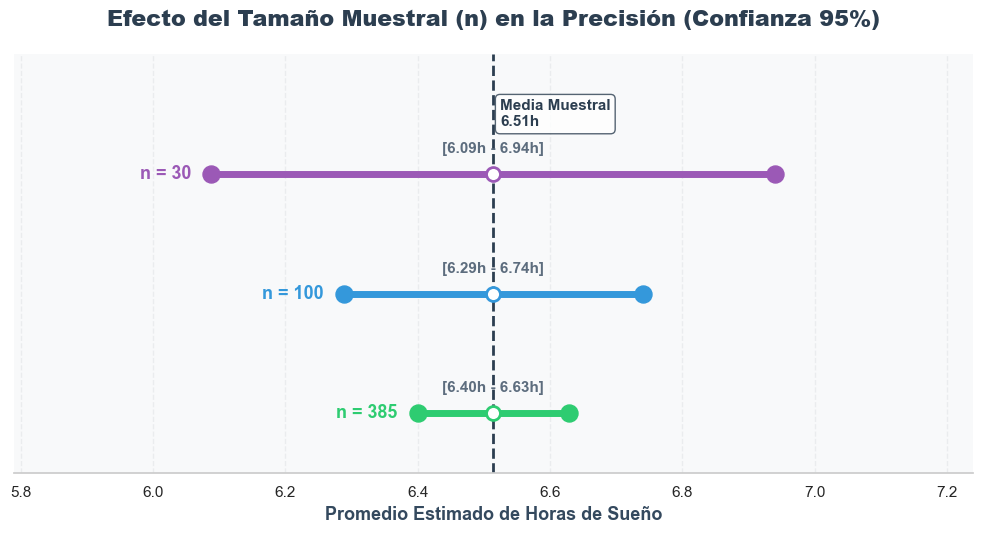

In [3]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargamos los datos
df = pd.read_csv('Muestra_universidad.csv')
datos_sueno = df['Horas_Sueno']

# Extraemos los parámetros base de nuestra muestra
media_base = datos_sueno.mean()
desviacion_base = datos_sueno.std()

# Tamaños de muestra hipotéticos para la comparación
tamanos_muestra = [30, 100, len(datos_sueno)] # 30, 100 y 385
nivel_confianza = 0.95 # Fijo al 95%

resultados_n = []

print("--- IMPACTO DEL TAMAÑO MUESTRAL (CONFIANZA FIJA AL 95%) ---")
print(f"Media Base: {media_base:.3f} horas | Desviación Base: {desviacion_base:.3f} horas\n")

for n in tamanos_muestra:
    # Aislamos el efecto de 'n' calculando el error estándar teórico para cada tamaño
    error_estandar_teorico = desviacion_base / np.sqrt(n)
    grados_libertad = n - 1
    
    inf, sup = stats.t.interval(nivel_confianza, df=grados_libertad, loc=media_base, scale=error_estandar_teorico)
    amplitud = sup - inf
    resultados_n.append((n, inf, sup))
    
    print(f"Tamaño de muestra (n={n}):")
    print(f"  Rango: [{inf:.3f}h  -  {sup:.3f}h]")
    print(f"  Amplitud del intervalo: {amplitud:.3f} horas\n")

# --- CONSTRUCCIÓN DEL GRÁFICO ---
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#F8F9FA", "grid.color": "#E5E7E9"})
fig, ax = plt.subplots(figsize=(10, 5.5))

# Eje Y ficticio para separar las líneas (n pequeño arriba, n grande abajo)
y_pos = [3, 2, 1]  
colores = ['#9B59B6', '#3498DB', '#2ECC71'] # Morado, Azul, Verde

for i, (n, inf, sup) in enumerate(resultados_n):
    # Línea del intervalo
    ax.plot([inf, sup], [y_pos[i], y_pos[i]], color=colores[i], linewidth=5, zorder=1)
    
    # Remates en los extremos
    ax.scatter([inf, sup], [y_pos[i], y_pos[i]], color=colores[i], s=150, zorder=2)
    
    # Punto central de la media
    ax.scatter([media_base], [y_pos[i]], color='white', edgecolor=colores[i], s=100, linewidth=2, zorder=3)
    
    # Etiqueta del tamaño de muestra (Izquierda)
    ax.text(inf - 0.03, y_pos[i], f"n = {n}", 
            verticalalignment='center', horizontalalignment='right',
            fontsize=13, fontweight='bold', color=colores[i])
    
    # Etiqueta del rango (Arriba de la línea)
    ax.text(media_base, y_pos[i] + 0.15, f"[{inf:.2f}h - {sup:.2f}h]", 
            verticalalignment='bottom', horizontalalignment='center',
            fontsize=11, fontweight='semibold', color='#5D6D7E')

# Línea vertical punteada de fondo
ax.axvline(media_base, color='#2C3E50', linestyle='--', linewidth=2, zorder=0)

# Cuadro de texto para la media
ax.text(media_base + 0.01, 3.5, f"Media Muestral\n{media_base:.2f}h", 
        verticalalignment='center', horizontalalignment='left',
        fontsize=11, fontweight='bold', color='#2C3E50',
        bbox=dict(facecolor='white', edgecolor='#2C3E50', boxstyle='round,pad=0.3', alpha=0.8))

ax.set_title('Efecto del Tamaño Muestral (n) en la Precisión (Confianza 95%)', 
             fontsize=16, fontweight='heavy', pad=20, color="#2C3E50")
ax.set_xlabel('Promedio Estimado de Horas de Sueño', fontsize=13, weight='bold', color="#34495E")

# Limpieza y márgenes
ax.set_yticks([]) 
ax.set_ylim(0.5, 4.0)
# Ajustamos el margen basándonos en el intervalo más ancho (el primero)
margen = (resultados_n[0][2] - resultados_n[0][1]) * 0.35
ax.set_xlim(resultados_n[0][1] - margen, resultados_n[0][2] + margen)

sns.despine(left=True, bottom=False, top=True, right=True)
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 4. Análisis e Interpretaciones de los Resultados

Tras calcular y visualizar los intervalos de confianza para nuestra muestra de 385 estudiantes, podemos sacar conclusiones concretas sobre la población total de la universidad. 

Al nivel estándar de **95% de confianza**, las interpretaciones de nuestros datos son las siguientes:

#### A. Sobre las Horas de Sueño
* **Interpretación:** Podemos afirmar con un 95% de seguridad que el estudiante promedio de nuestra universidad duerme entre **6.40 y 6.63 horas diarias**. 
* **Análisis Crítico:** Lo más preocupante aquí no es el margen de error, sino que **todo el intervalo está por debajo del umbral mínimo recomendado de 7 horas**. Esto confirma empíricamente que existe un problema crónico de déficit de sueño a nivel institucional, no solo en casos aislados.

#### B. Sobre la Actividad Física
* **Interpretación:** Con un 95% de confianza, estimamos que el tiempo promedio de ejercicio semanal de toda la población estudiantil se ubica entre **133.88 y 143.14 minutos**.
* **Análisis Crítico:** Nuevamente, el límite superior de nuestro intervalo de confianza ni siquiera alcanza la recomendación de 150 minutos de la OMS. Esto nos indica que la universidad, en promedio, es una comunidad con tendencia al sedentarismo. 

#### C. Sobre la Metodología (Confianza vs. Muestra)
Durante los ejercicios de simulación comprobamos dos principios fundamentales que justifican nuestro diseño metodológico:
1. **No vale la pena exigir un 99% de confianza:** Al hacerlo, el rango de estimación se vuelve tan amplio que pierde utilidad para tomar decisiones (ej. decir que duermen entre 5 y 8 horas no nos ayuda a saber si hay déficit o no). El 95% demostró ser el equilibrio perfecto entre seguridad y precisión.
2. **El tamaño de muestra (n=385) fue adecuado:** Como demostramos en el gráfico de dispersión, encuestar a solo 30 personas nos daba un margen de error demasiado grande. Haber encuestado a los 385 alumnos redujo nuestra incertidumbre a fracciones de hora, logrando un dato robusto sin el costo altísimo que hubiera implicado encuestar a miles de estudiantes.